# Trabajo Práctico Nro. 3

FAO es la agencia de las Naciones Unidas que lidera el esfuerzo internacional para poner fin al hambre.

Según da cuenta en su sitio de Internet (www.fao.org) trabaja para lograr la seguridad alimentaria para todos, y al mismo tiempo garantizar el acceso regular a alimentos suficientes y de buena calidad para llevar una vida activa y sana. Posee 195 miembros - 194 países y la Unión Europea y trabaja en más de 130 países en todo el mundo.

En este caso FAO se ha dado cuenta que posee mucha información disponible y desea contratar un equipo de Analistas y Científicos de datos.

Para ello FAO pone a disposición su dataset "Totales de las emisiones" disponible en la dirección: https://www.fao.org/faostat/es/#data/GT y espera que el grupo de consultores les realice una "Propuesta de Trabajo" dando cuenta de lo que podrían realizar. (se recomienda descargar el archivo: Todos los Datos Normalizado (16.62 MB) )

# Objetivos del Trabajo Propuesto

**Analizar las Emisiones de Gases de Efecto Invernadero**

**Identificar Tendencias y Patrones**

**Evaluar la Relación entre las Emisiones de elementos con mayor volumen de emision en el periodo analizado**

**Facilitar la Toma de Decisiones**



#Descripción del Dataset

El dataset "Totales de las emisiones" de la FAO proporciona datos sobre las emisiones de gases
de efecto invernadero (GEI) generadas por el sector agrícola a nivel mundial. Este conjunto de
datos incluye información desglosada por país, tipo de gas (como metano y óxido
nitroso), y actividades agrícolas específicas. La información abarca varios años y permite analizar
las tendencias en las emisiones.

In [1]:
# ================================
#   Carga del Dataset FAO
# ================================

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Ruta local esperada si alguien clona el repositorio
local_path = '../data/raw/FAO_Emisiones_Totales.csv'

# Ruta alternativa (tu Google Drive en Colab)
colab_path = '/content/drive/MyDrive/UGR/Emisiones_Totales_S_Todos_los_Datos_(Normalizado).csv'

# Si existe en la carpeta del repositorio, usarla.
# Si no existe, intentar leer desde tu Google Drive.
if os.path.exists(local_path):
    file_path = local_path
    print("✔ Cargando dataset desde: data/raw/")
else:
    from google.colab import drive
    drive.mount('/content/drive')
    file_path = colab_path
    print("✔ Cargando dataset desde tu Google Drive")

df_totales_emision = pd.read_csv(file_path, encoding='latin-1')

df_totales_emision.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✔ Cargando dataset desde tu Google Drive


,Código del área,Código del área (M49),Área,Código del producto,Producto,Código del elemento,Elemento,Código del año,Año,Código fuente,Fuente,Unidad,Valor,Símbolo,Nota
0,2,'004,Afganistán,5064,Residuos agrícolas,7234,Emisiones directas (N2O),1961,1961,3050,FAO TIER 1,mil toneladas,0.8762,E,NaN
1,2,'004,Afganistán,5064,Residuos agrícolas,7234,Emisiones directas (N2O),1962,1962,3050,FAO TIER 1,mil toneladas,0.8829,E,NaN
2,2,'004,Afganistán,5064,Residuos agrícolas,7234,Emisiones directas (N2O),1963,1963,3050,FAO TIER 1,mil toneladas,0.8236,E,NaN
3,2,'004,Afganistán,5064,Residuos agrícolas,7234,Emisiones directas (N2O),1964,1964,3050,FAO TIER 1,mil toneladas,0.8882,E,NaN
4,2,'004,Afganistán,5064,Residuos agrícolas,7234,Emisiones directas (N2O),1965,1965,3050,FAO TIER 1,mil toneladas,0.8978,E,NaN


In [2]:
# observo las ultimas 5 filas
df_totales_emision.tail()

,Código del área,Código del área (M49),Área,Código del producto,Producto,Código del elemento,Elemento,Código del año,Año,Código fuente,Fuente,Unidad,Valor,Símbolo,Nota
2486522,5873,'198,OECD,6829,Emisiones totales excluyendo LULUCF,723113,Emisiones (CO2eq) (AR5),2017,2017,3050,FAO TIER 1,mil toneladas,1.558409e+07,E,NaN
2486523,5873,'198,OECD,6829,Emisiones totales excluyendo LULUCF,723113,Emisiones (CO2eq) (AR5),2018,2018,3050,FAO TIER 1,mil toneladas,1.570374e+07,E,NaN
2486524,5873,'198,OECD,6829,Emisiones totales excluyendo LULUCF,723113,Emisiones (CO2eq) (AR5),2019,2019,3050,FAO TIER 1,mil toneladas,1.531582e+07,E,NaN
2486525,5873,'198,OECD,6829,Emisiones totales excluyendo LULUCF,723113,Emisiones (CO2eq) (AR5),2020,2020,3050,FAO TIER 1,mil toneladas,1.395840e+07,E,NaN
2486526,5873,'198,OECD,6829,Emisiones totales excluyendo LULUCF,723113,Emisiones (CO2eq) (AR5),2021,2021,3050,FAO TIER 1,mil toneladas,1.456847e+07,E,NaN


#Acciones a Realizar

**Definición del Problema:**

*   El objetivo del análisis será identificar los principales contribuyentes a las emisiones y evaluar
las tendencias a lo largo del tiempo.

  Frente al gran volumen de datos, agrupamos las emisiones por continentes a lo largo del tiempo.
 - Evolución de los valores por Año y Continente

  Para luego ir desagregando por Elemento
 - Evolución de los valores por Año y Elemento'

**Recolección y Preparación de Datos:**

*   Cargar y explorar el dataset en un entorno de análisis.
*   Realizar una limpieza de datos que incluya la eliminación de duplicados, el manejo de
valores faltantes y la verificación de la consistencia de los datos.

In [3]:
#visualizo las columnas con su tipo de datos
df_totales_emision.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2486527 entries, 0 to 2486526
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Código del área        int64  
 1   Código del área (M49)  object 
 2   Área                   object 
 3   Código del producto    int64  
 4   Producto               object 
 5   Código del elemento    int64  
 6   Elemento               object 
 7   Código del año         int64  
 8   Año                    int64  
 9   Código fuente          int64  
 10  Fuente                 object 
 11  Unidad                 object 
 12  Valor                  float64
 13  Símbolo                object 
 14  Nota                   float64
dtypes: float64(2), int64(6), object(7)
memory usage: 284.6+ MB


**Comprensión de los datos**


*   Código del área: Identificador para el Área.
*   Código del área (M49): Sistema de codificación de tres digitos (ONU) para representar paises, regiones y áreas para fines estadisticos.
*   Área: Pais de origen de las emisiones
*   Código del producto: Identificador del producto
*   Producto: Nombre del item/producto/acción que genera la emisión
*   Código del elemento: Identificador del elemento (GHG)
*   Elemento: Nombre del gas de efecto invernadero (GHG)
*   Código del año: Identificador para el año
*   Año: Año del valor informado
*   Código fuente: Identificador para la fuente
*   Fuente: Denominación de la fuente
*   Unidad: Unidad del valor informado (en miles de toneladas)
*   Valor: Valor informado
*   Símbolo: (A)Cifra oficial, (E) Valor Estimado, (F) Valor previsto
*   Nota: Expresión númerica


Resumiendo:

*   Tienen 2486527 registros
*   Tienen 15 columnas
*   Hay 2 columnas flotantes
*   Hay 6 columnas enteras
*   Hay 7 columnas object. Que parece tienen datos de cadenas de texto
*   Hay columnas que tienen NaN


In [4]:
# Verificamos si hay datos duplicados
df_totales_emision.duplicated().sum()

np.int64(0)

In [5]:
# Qué columnas tienen todos NA?
df_totales_emision.isna().all()

,0
Código del área,False
Código del área (M49),False
Área,False
Código del producto,False
Producto,False
Código del elemento,False
Elemento,False
Código del año,False
Año,False
Código fuente,False


Se observa que todos los registros del campo Notas estan con NAN

In [6]:
#Hay datos distintos para la Unidad?
df_totales_emision['Unidad'].unique()

array(['mil toneladas'], dtype=object)

In [7]:
#Hay datos distintos para el Símbolo?
df_totales_emision['Símbolo'].unique()

array(['E', 'F', 'A'], dtype=object)

In [8]:
#Hay datos distintos para el año?
df_totales_emision['Año'].unique()

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2030, 2050])

Se observa que el año 2030 y 2050 se puede despreciar por ser estimaciones futuras

In [9]:
# Contamos cuántos registros del dataset tienen 2030 o 2050 en la columna 'Año'
count_2030_2050 = df_totales_emision['Año'].isin([2030, 2050]).sum()

# Mostramos el resultado
print(f'Número de celdas con valor 2030 o 2050 en la columna "Año" antes de simplificar: {count_2030_2050}')

Número de celdas con valor 2030 o 2050 en la columna "Año" antes de simplificar: 23690


In [10]:
#Hay datos distintos para el Área?
df_totales_emision['Área'].unique()

array(['Afganistán', 'Albania', 'Alemania', 'Andorra', 'Angola',
       'Anguila', 'Antigua y Barbuda', 'Antillas Neerlandesas (ex)',
       'Arabia Saudita', 'Argelia', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaiyán', 'Bahamas', 'Bahrein',
       'Bangladesh', 'Barbados', 'Belarús', 'Bélgica',
       'Bélgica-Luxemburgo', 'Belice', 'Benin', 'Bermudas', 'Bhután',
       'Bolivia (Estado Plurinacional de)', 'Bosnia y Herzegovina',
       'Botswana', 'Brasil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Camboya', 'Camerún',
       'Canadá', 'Chad', 'Checoslovaq', 'Chequia', 'Chile', 'China',
       'China, Continental', 'China, RAE de Hong Kong',
       'China, RAE de Macao', 'China, Taiwán provincia de', 'Chipre',
       'Colombia', 'Comoras', 'Congo', 'Costa Rica', "Côte d'Ivoire",
       'Croacia', 'Cuba', 'Dinamarca', 'Djibouti', 'Dominica', 'Ecuador',
       'Egipto', 'El Salvador', 'Emiratos Árabes Unidos', 'Eritrea

Se observa que hay areas que se pueden omitir:

Ejemplo en la lista se ven paises y regiones o continentes.

'Mundo', 'Africa', 'África oriental', 'África central', 'África septentrional','África meridional', 'África occidental','Américas','América septentrional', 'América central', 'El Caribe','América del Sur', 'Asia', 'Asia central', 'Asia oriental','Asia meridional', 'Asia sudoriental', 'Asia occidental', 'Europa','Europa oriental', 'Europa septentrional', 'Europa meridional','Europa occidental', 'Oceanía', 'Australia y Nueva Zelandia','Melanesia', 'Micronesia', 'Polinesia', 'Unión Europea (27)','Los países menos desarrollados','Países sin litoral en vías de desarrollo','Pequeñas islas en vías de Desarrollo','Países de bajos ingresos y con déficit de alim.','Import netos alim en Des', 'Países Anexo I', 'Países No-Anexo I','OECD'


In [11]:
#Cuántas Áreas únicas tiene el dataset?
num_areas_unicas = df_totales_emision['Área'].nunique()
print(num_areas_unicas)

280


In [12]:
#Hay datos distintos para el Codigo Fuente?
df_totales_emision['Código fuente'].unique()
df_totales_emision['Fuente'].unique()

array(['FAO TIER 1', 'UNFCCC'], dtype=object)

FAO TIER 1 es el nivel inicial de estimación de emisiones, adecuado para países o situaciones en las que no se disponen de datos más específicos o detallados

UNFCCC se refiere a los informes y datos proporcionados por la Convención Marco de las Naciones Unidas sobre el Cambio Climático (UNFCCC) relacionados con las emisiones de gases de efecto invernadero (GEI) y otros aspectos relevantes para la lucha contra el cambio climático, particularmente en el sector agrícola.


In [13]:
#Hay datos distintos para el Codigo del Producto?
df_totales_emision['Código del producto'].unique()

array([ 5064,  5060,  5066,  5058,  5059,  5063,  5062,  5061,  6729,
       67292, 67291,  6994,  6751,  6750,  6795,  6993,  6992, 69921,
        6991,  6504,  6508,  6505,  6815,  6821,  6817,  6818,  6819,
        6518,  6996,  6516,  6517,  6995,  5084,  5085,  1711,  1709,
        1707,  6824,  6825,  6829,  6997,  6507,  6506])

In [14]:
# Limpieza de los datos y eliminación de columnas irrelevantes:

# Paso 1: Crear una copia del dataframe original
df_totales_emision_simplificado = df_totales_emision.copy()

# Paso 2: Eliminar las comillas y otros caracteres no deseados
df_totales_emision_simplificado['Código del área (M49)'] = df_totales_emision_simplificado['Código del área (M49)'].str.replace('"', '', regex=False)
df_totales_emision_simplificado['Código del área (M49)'] = df_totales_emision_simplificado['Código del área (M49)'].str.replace("'", '', regex=False)

# Paso 3: Convertir los valores a números, los que no se pueden convertir se vuelven NaN
df_totales_emision_simplificado['Código del área (M49)'] = pd.to_numeric(df_totales_emision_simplificado['Código del área (M49)'], errors='coerce')

# Paso 4: Convertir finalmente a int64
df_totales_emision_simplificado['Código del área (M49)'] = df_totales_emision_simplificado['Código del área (M49)'].astype('Int64')  # Usamos 'Int64' (con I mayúscula) para soportar valores NaN

# Paso 5: Descartamos los Productos que tengan valores totales
df_totales_emision_simplificado = df_totales_emision_simplificado[~df_totales_emision_simplificado['Producto'].str.contains("Emisiones totales", case=False, na=False)]

# Paso 6: Filtramos los registros que no tengan 2030 ni 2050 en la columna 'Año'
df_totales_emision_simplificado= df_totales_emision_simplificado[~df_totales_emision_simplificado['Año'].isin([2030, 2050])]

# Paso 7: Sacamos las columnas duplicadas o redundantes
df_totales_emision_simplificado.drop(columns=['Código del año', 'Código del área', 'Nota'], inplace=True)

# Verificamos el dataframe
df_totales_emision_simplificado.head()

,Código del área (M49),Área,Código del producto,Producto,Código del elemento,Elemento,Año,Código fuente,Fuente,Unidad,Valor,Símbolo
0,4,Afganistán,5064,Residuos agrícolas,7234,Emisiones directas (N2O),1961,3050,FAO TIER 1,mil toneladas,0.8762,E
1,4,Afganistán,5064,Residuos agrícolas,7234,Emisiones directas (N2O),1962,3050,FAO TIER 1,mil toneladas,0.8829,E
2,4,Afganistán,5064,Residuos agrícolas,7234,Emisiones directas (N2O),1963,3050,FAO TIER 1,mil toneladas,0.8236,E
3,4,Afganistán,5064,Residuos agrícolas,7234,Emisiones directas (N2O),1964,3050,FAO TIER 1,mil toneladas,0.8882,E
4,4,Afganistán,5064,Residuos agrícolas,7234,Emisiones directas (N2O),1965,3050,FAO TIER 1,mil toneladas,0.8978,E


In [15]:
# levantamos el CSV, especificando la codificación 'latin-1'
file_path = '/content/drive/MyDrive/UGR/UNSD — Methodology.csv'

df_AreasM49 = pd.read_csv(file_path)

# observo las primeras 5 filas
df_AreasM49.head()

,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
0,1,Mundo,142.0,Asia,34.0,Asia meridional,NaN,NaN,Afganistán,4,AF,AFG,x,x,NaN
1,1,Mundo,150.0,Europa,39.0,Europa meridional,NaN,NaN,Albania,8,AL,ALB,NaN,NaN,NaN
2,1,Mundo,150.0,Europa,155.0,Europa occidental,NaN,NaN,Alemania,276,DE,DEU,NaN,NaN,NaN
3,1,Mundo,150.0,Europa,39.0,Europa meridional,NaN,NaN,Andorra,20,AD,AND,NaN,NaN,NaN
4,1,Mundo,2.0,África,202.0,África Subsahariana,17.0,África central,Angola,24,AO,AGO,x,NaN,NaN


In [16]:
#visualizo las columnas con su tipo de datos
df_AreasM49.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Global Code                              248 non-null    int64  
 1   Global Name                              248 non-null    object 
 2   Region Code                              247 non-null    float64
 3   Region Name                              247 non-null    object 
 4   Sub-region Code                          247 non-null    float64
 5   Sub-region Name                          247 non-null    object 
 6   Intermediate Region Code                 105 non-null    float64
 7   Intermediate Region Name                 105 non-null    object 
 8   Country or Area                          248 non-null    object 
 9   M49 Code                                 248 non-null    int64  
 10  ISO-alpha2 Code                          247 non-n

In [17]:
# Filtramos los paises por código M49
df_totales_emision_simplificado = df_totales_emision_simplificado[df_totales_emision_simplificado['Código del área (M49)'].isin(df_AreasM49['M49 Code'])]

In [18]:
# Creamos un dataframe con los campos relevantes que necesitamos para los paises llamado df_paises_regiones
df_paises_regiones = df_AreasM49[['Region Name', 'Country or Area', 'M49 Code']].copy()
df_paises_regiones = df_paises_regiones.rename(columns={'Region Name': 'Region', 'Country or Area': 'Pais', 'M49 Code':'CM49'})
df_paises_regiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Region  247 non-null    object
 1   Pais    248 non-null    object
 2   CM49    248 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 5.9+ KB


In [19]:
# Fusionamos el dataframe df_paises_regiones con nuestro df_totales_emision_simplificado y lo almacenamos en el df_consolidado
df_consolidado = pd.merge(df_totales_emision_simplificado, df_paises_regiones, left_on="Código del área (M49)", right_on="CM49", how="left")

#Sacamos las columnas duplicadas o redundantes
df_consolidado.drop(columns=['Pais', 'CM49'], inplace=True)

df_consolidado.head()

,Código del área (M49),Área,Código del producto,Producto,Código del elemento,Elemento,Año,Código fuente,Fuente,Unidad,Valor,Símbolo,Region
0,4,Afganistán,5064,Residuos agrícolas,7234,Emisiones directas (N2O),1961,3050,FAO TIER 1,mil toneladas,0.8762,E,Asia
1,4,Afganistán,5064,Residuos agrícolas,7234,Emisiones directas (N2O),1962,3050,FAO TIER 1,mil toneladas,0.8829,E,Asia
2,4,Afganistán,5064,Residuos agrícolas,7234,Emisiones directas (N2O),1963,3050,FAO TIER 1,mil toneladas,0.8236,E,Asia
3,4,Afganistán,5064,Residuos agrícolas,7234,Emisiones directas (N2O),1964,3050,FAO TIER 1,mil toneladas,0.8882,E,Asia
4,4,Afganistán,5064,Residuos agrícolas,7234,Emisiones directas (N2O),1965,3050,FAO TIER 1,mil toneladas,0.8978,E,Asia


In [20]:
df_consolidado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839807 entries, 0 to 1839806
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Código del área (M49)  Int64  
 1   Área                   object 
 2   Código del producto    int64  
 3   Producto               object 
 4   Código del elemento    int64  
 5   Elemento               object 
 6   Año                    int64  
 7   Código fuente          int64  
 8   Fuente                 object 
 9   Unidad                 object 
 10  Valor                  float64
 11  Símbolo                object 
 12  Region                 object 
dtypes: Int64(1), float64(1), int64(4), object(7)
memory usage: 184.2+ MB


In [21]:
#Hay datos distintos para el Símbolo?
df_consolidado['Símbolo'].unique()

array(['E', 'A'], dtype=object)

In [22]:
# Finalmente nos quedamos con los campos relevantes para nuestro analisis
#df_analisis1 = df_consolidado[['Region','Código del área (M49)', 'Área', 'Producto', 'Elemento', 'Año', 'Valor']]
#df_analisis1 = df_analisis1[(df_analisis1['Año'] <= 2024) & (df_analisis1['Region'].notnull())]

#df_analisis1.head()

In [23]:
#Con cuántas Áreas únicas quedo el dataset consolidado?
num_areas_unicas = df_consolidado['Área'].nunique()
print(num_areas_unicas)

231



**Análisis Exploratorio de Datos (EDA)**

*   Realizar un análisis descriptivo para resumir las características del dataset.

*   Visualizar las emisiones por año, categoría de producto y área geográfica,
utilizando gráficos de línea, barras.

*   Visualizar las tendencias en el tiempo de las emisiones de gases, diferenciando
por tipo de gas (CO₂, CH₄, N₂O) y por sector agrícola.

**Evaluación y Comunicación de Resultados:**

* Evaluar los resultados y la validez de los modelos aplicados.

* Preparar un informe que comunique los hallazgos, visualizaciones y recomendaciones a
partir del análisis.

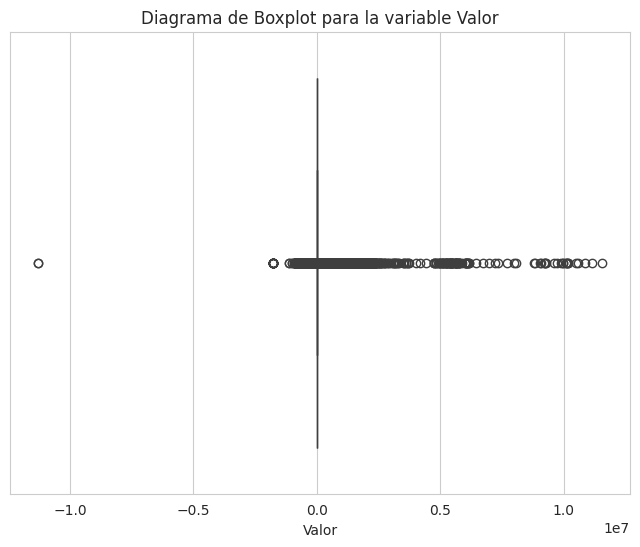

In [24]:
# Crear un box plot para la variable 'Valor'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_consolidado['Valor'])

# Añadir título y etiquetas
plt.title('Diagrama de Boxplot para la variable Valor')
plt.xlabel('Valor')

plt.savefig("boxplot_valor.png", dpi=300, bbox_inches="tight")

# Mostrar el gráfico
plt.show()

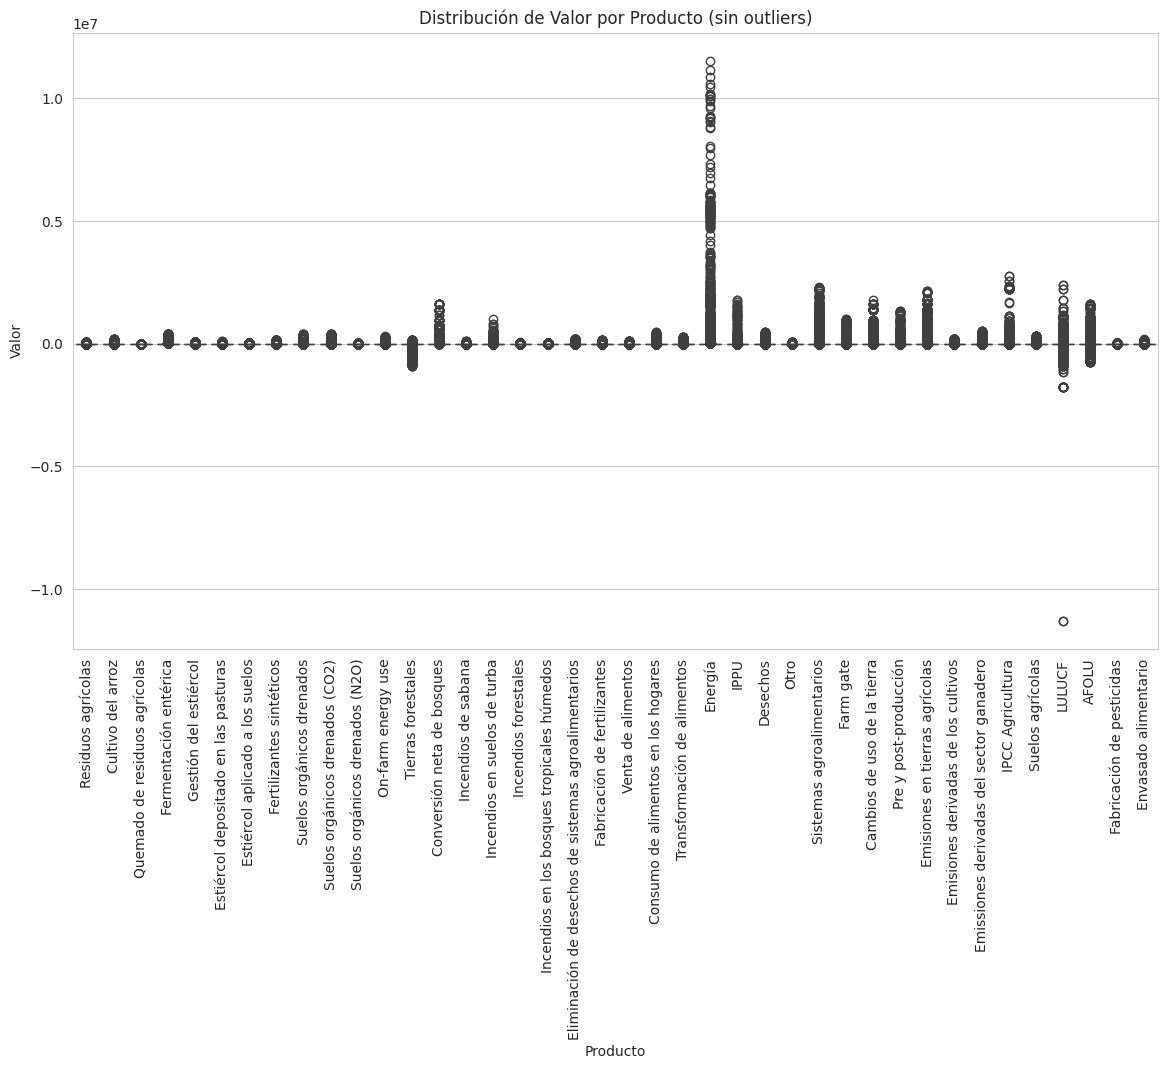

In [25]:
# Box plot sin outliers
plt.figure(figsize=(14, 8))
sns.boxplot(x='Producto', y='Valor', data= df_consolidado)

# Añadir título y etiquetas
plt.title('Distribución de Valor por Producto (sin outliers)')
plt.xlabel('Producto')
plt.ylabel('Valor')

# Mostrar el gráfico
plt.xticks(rotation=90)

plt.savefig("boxplot_producto.png", dpi=300, bbox_inches="tight")

plt.show()

In [26]:
# Obtenemos el top 5 de los productos con mayor frecuencia y el top 5 de los productos con menor frecuencia
top_5_mas_emision = df_consolidado.groupby("Código del producto")["Valor"].sum().sort_values(ascending=False).head(5)
top_5_menos_emision = df_consolidado.groupby("Código del producto")["Valor"].sum().sort_values(ascending=True).head(5)

# Creamos un dataframe con los códigos de producto, sus nombres asociados y las emisiones
productos = df_consolidado[['Código del producto', 'Producto']].drop_duplicates()

# Para los productos con mayor emisión
top_5_mas_emision_df = top_5_mas_emision.reset_index()
top_5_mas_emision_df.columns = ['Código del producto', 'Emisión']
top_5_mas_emision_df = top_5_mas_emision_df.merge(productos, on='Código del producto', how='left')

# Para los productos con menor emisión
top_5_menos_emision_df = top_5_menos_emision.reset_index()
top_5_menos_emision_df.columns = ['Código del producto', 'Emisión']
top_5_menos_emision_df = top_5_menos_emision_df.merge(productos, on='Código del producto', how='left')

# Mostramos los resultados
print("Top 5 productos con mayor emisión:")
print(top_5_mas_emision_df[['Código del producto', 'Producto', 'Emisión']])

print("\nTop 5 productos con menor emisión:")
print(top_5_menos_emision_df[['Código del producto', 'Producto', 'Emisión']])


Top 5 productos con mayor emisión:
   Código del producto                        Producto       Emisión
0                 6821                         Energía  1.936195e+09
1                 6518       Sistemas agroalimentarios  1.235303e+09
2                 1711                IPCC Agricultura  7.688847e+08
3                 6995  Emisiones en tierras agrícolas  7.141460e+08
4                 6824                           AFOLU  4.564852e+08

Top 5 productos con menor emisión:
   Código del producto                         Producto       Emisión
0                 6751               Tierras forestales -3.860085e+08
1                 1707                           LULUCF -2.731619e+07
2                 5066    Quemado de residuos agrícolas  4.227408e+06
3                 6997        Fabricación de pesticidas  4.453578e+06
4                67291  Suelos orgánicos drenados (N2O)  8.180619e+06


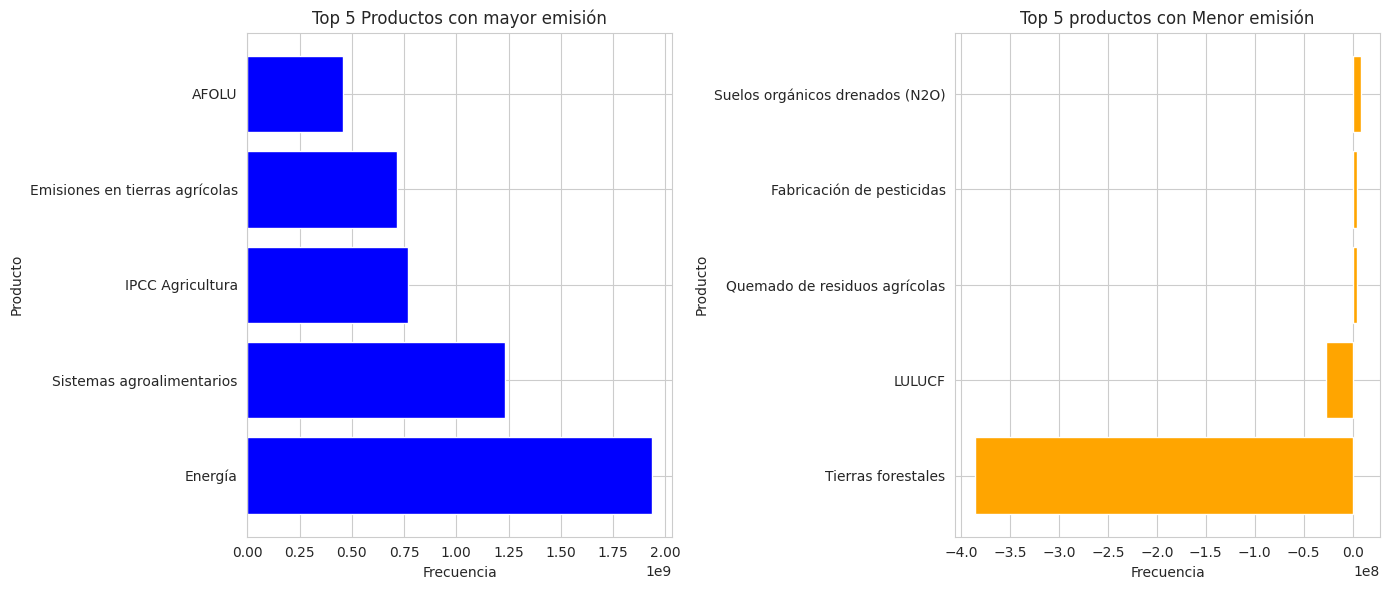

In [27]:
# Crear gráficos de barras horizontales
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico horizontal para los productos más frecuentes
axes[0].barh(top_5_mas_emision_df['Producto'], top_5_mas_emision_df['Emisión'], color='blue')
axes[0].set_title('Top 5 Productos con mayor emisión')
axes[0].set_xlabel('Frecuencia')
axes[0].set_ylabel('Producto')

# Gráfico horizontal para los productos menos frecuentes
axes[1].barh(top_5_menos_emision_df['Producto'], top_5_menos_emision_df['Emisión'], color='orange')
axes[1].set_title('Top 5 productos con Menor emisión')
axes[1].set_xlabel('Frecuencia')
axes[1].set_ylabel('Producto')

plt.savefig("top5_emisiones.png", dpi=300, bbox_inches="tight")

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# Aspectos que se desea Observar

**Tendencias en las Emisiones**

**Comparación entre Áreas**

**Impacto de Productos Específicos**

**Correlaciones entre Variables**

In [28]:
# Finalmente nos quedamos con los campos relevantes para nuestro analisis
df_analisis1 = df_consolidado[['Region','Código del área (M49)', 'Área', 'Producto', 'Elemento', 'Año', 'Valor']]
df_analisis1 = df_analisis1[(df_analisis1['Año'] <= 2024) & (df_analisis1['Region'].notnull())]

df_analisis1.head()

,Region,Código del área (M49),Área,Producto,Elemento,Año,Valor
0,Asia,4,Afganistán,Residuos agrícolas,Emisiones directas (N2O),1961,0.8762
1,Asia,4,Afganistán,Residuos agrícolas,Emisiones directas (N2O),1962,0.8829
2,Asia,4,Afganistán,Residuos agrícolas,Emisiones directas (N2O),1963,0.8236
3,Asia,4,Afganistán,Residuos agrícolas,Emisiones directas (N2O),1964,0.8882
4,Asia,4,Afganistán,Residuos agrícolas,Emisiones directas (N2O),1965,0.8978


In [29]:
# Agrupamos por 'Año' y 'Region' y calculamos la media de los valores
df_años_categoria = df_analisis1.groupby(['Año', 'Region'])['Valor'].mean().unstack()

df_años_categoria

Region,Américas,Asia,Europa,Oceanía,África
Año,,,,,
1961,2568.596226,3823.568779,2433.123108,1315.690103,505.123131
1962,2629.855169,3867.862422,2459.109036,1357.268838,516.447076
1963,2671.217723,3899.477708,2433.187066,1380.581767,523.504188
1964,2740.857362,4036.040353,2431.054973,1415.769362,536.595913
1965,2812.700851,4088.634602,2478.395836,1438.498848,556.084630
...,...,...,...,...,...
2017,6299.772591,10308.415689,2343.234110,1293.674526,3284.760121
2018,6293.034409,10722.422954,2351.875535,1289.009410,3286.169384
2019,6361.044452,11117.693543,2329.233598,1211.274162,3333.247665


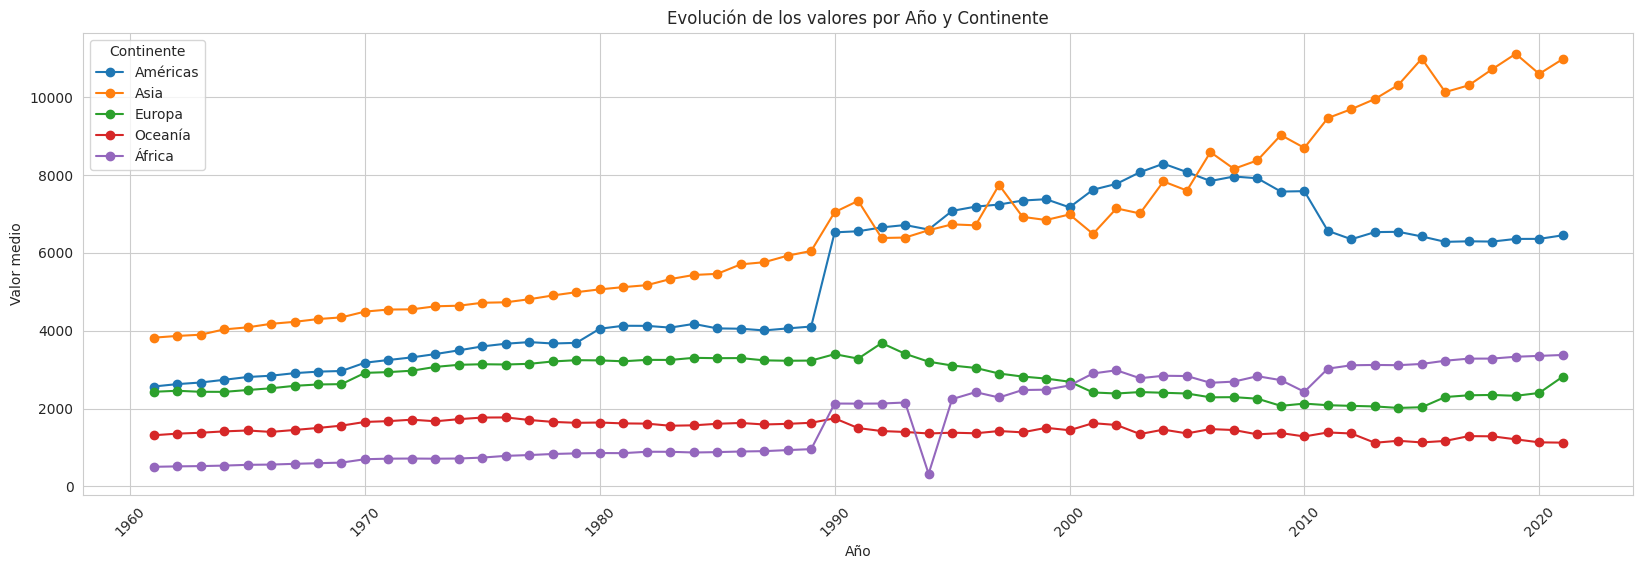

In [30]:
# Graficamos
df_años_categoria.plot(kind='line', marker='o', figsize=(20,6))
plt.title('Evolución de los valores por Año y Continente')
plt.xlabel('Año')
plt.ylabel('Valor medio')
plt.xticks(rotation=45)
plt.legend(title='Continente')
plt.grid(True)
plt.savefig("evolucion_continentes.png", dpi=300, bbox_inches="tight")
plt.show()

In [31]:
# Agrupamos por 'Año' y 'Elemento' y calculamos la media de los valores
df_años_elementos = df_consolidado.groupby(['Año', 'Elemento'])['Valor'].mean().unstack()

df_años_elementos

Elemento,Emisiones (CH4),Emisiones (CO2),Emisiones (CO2eq) (AR5),Emisiones (CO2eq) proveniente de CH4 (AR5),Emisiones (CO2eq) proveniente de F-gases (AR5),Emisiones (CO2eq) proveniente de N2O (AR5),Emisiones (N2O),Emisiones directas (N2O),Emisiones indirectas (N2O)
Año,,,,,,,,,
1961,252.513679,NaN,5778.451539,7070.383015,NaN,1659.580007,6.262566,5.282509,2.103026
1962,256.254864,NaN,5875.712803,7175.136204,NaN,1697.606130,6.406061,5.405010,2.145694
1963,257.483195,NaN,5926.441078,7209.529466,NaN,1734.139736,6.543924,5.524275,2.182541
1964,263.657627,NaN,6073.402638,7382.413568,NaN,1786.152866,6.740199,5.692434,2.241081
1965,267.440814,NaN,6193.825571,7488.342802,NaN,1850.160792,6.981739,5.898462,2.316908
...,...,...,...,...,...,...,...,...,...
2017,225.542854,12216.101166,13416.496857,6342.417231,1891.768463,2571.778563,9.668330,15.504296,5.813444
2018,227.073900,12637.939441,13668.574663,6384.866482,1975.324790,2545.732956,9.572795,15.448677,5.819262
2019,230.380925,12992.171757,13946.542232,6477.986657,2057.643486,2549.399935,9.585918,15.411526,5.835193


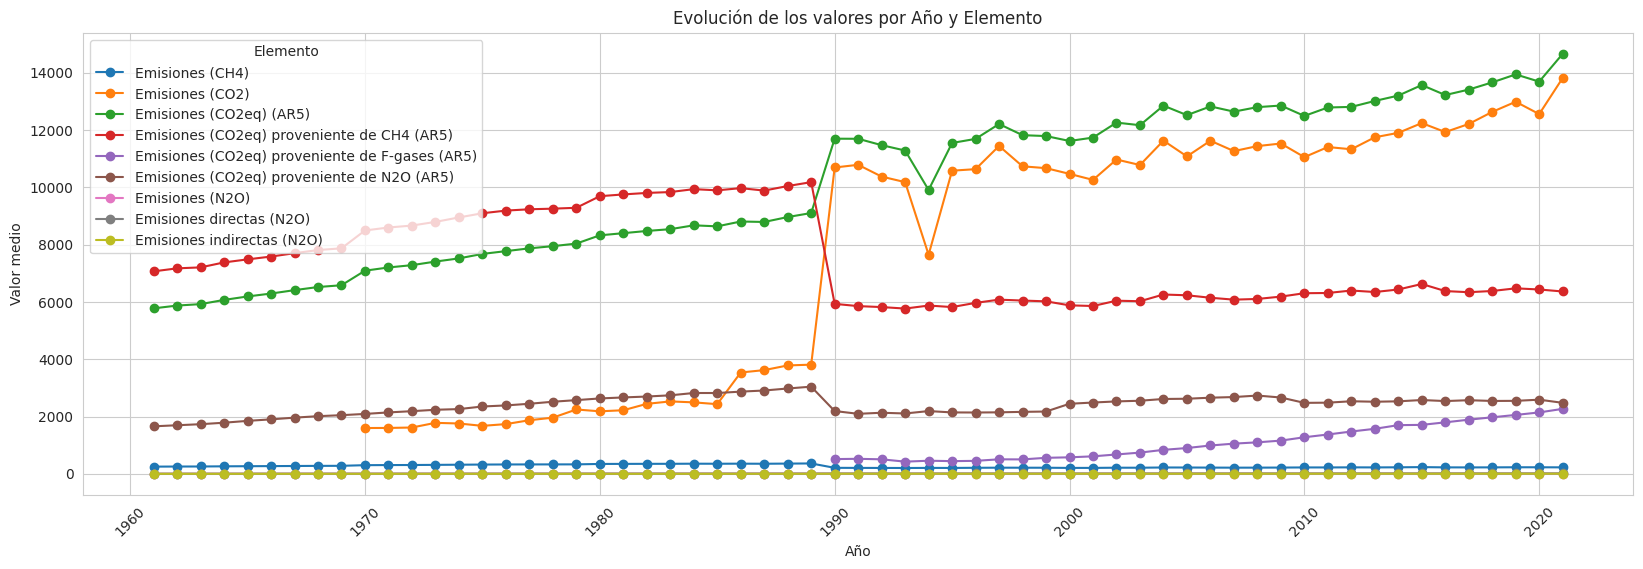

In [32]:
# Graficamos
df_años_elementos.plot(kind='line', marker='o', figsize=(20,6))
plt.title('Evolución de los valores por Año y Elemento')
plt.xlabel('Año')
plt.ylabel('Valor medio')
plt.xticks(rotation=45)
plt.legend(title='Elemento')
plt.grid(True)
plt.savefig("evolucion_elementos.png", dpi=300, bbox_inches="tight")
plt.show()

Entre 1989 y 1990, un suceso relevante en relación con el aumento de los elementos emitidos, según la FAO (Organización de las Naciones Unidas para la Agricultura y la Alimentación), está relacionado con la explosión de la producción agrícola y el aumento de las emisiones de gases contaminantes debido a los cambios en las prácticas agrícolas, la industrialización y el uso de fertilizantes y pesticidas. Sin embargo, en este período también se destaca un aumento en las emisiones de gases de efecto invernadero vinculados principalmente a la agricultura intensiva, especialmente en relación con la ganadería y el uso de maquinaria en los campos.

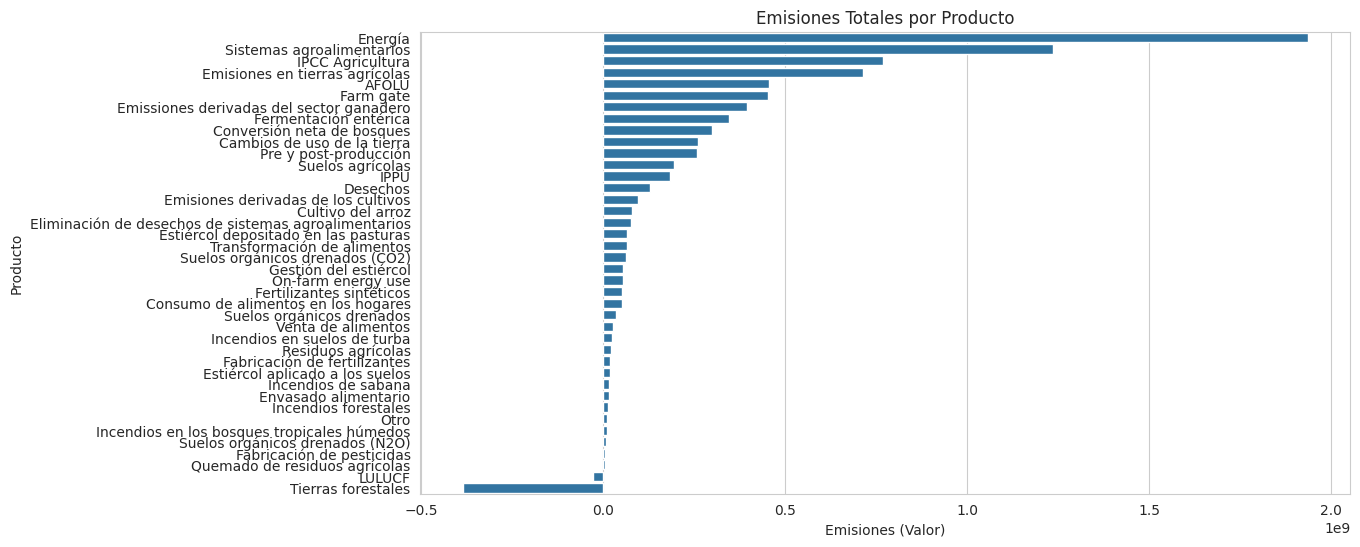

In [33]:
# Agrupar por producto y sumar las emisiones
emisiones_por_producto = df_consolidado.groupby('Producto')['Valor'].sum().reset_index()

# Gráfico de barras de emisiones por producto
plt.figure(figsize=(12, 6))
sns.barplot(data=emisiones_por_producto.sort_values('Valor', ascending=False), x='Valor', y='Producto')
plt.title('Emisiones Totales por Producto')
plt.xlabel('Emisiones (Valor)')
plt.ylabel('Producto')
plt.savefig("emisiones_por_producto.png", dpi=300, bbox_inches="tight")
plt.show()

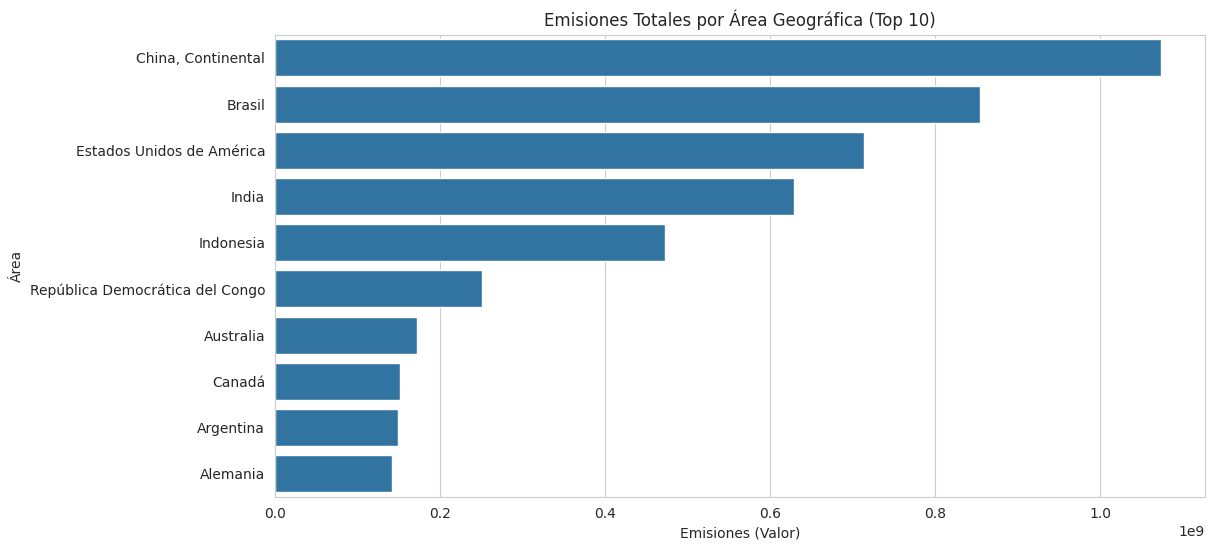

In [34]:
# Agrupar por área y sumar las emisiones
emisiones_por_area = df_consolidado.groupby('Área')['Valor'].sum().reset_index()

# Gráfico de barras de emisiones por área
plt.figure(figsize=(12, 6))
sns.barplot(data=emisiones_por_area.sort_values('Valor', ascending=False).head(10), x='Valor', y='Área')
plt.title('Emisiones Totales por Área Geográfica (Top 10)')
plt.xlabel('Emisiones (Valor)')
plt.ylabel('Área')
plt.savefig("emisiones_por_area.png", dpi=300, bbox_inches="tight")
plt.show()

#Métodos y/o Modelos a Aplicar

**Análisis Descriptivo:**

*   Describir el dataset usando estadísticas descriptivas (medianas, promedios, etc.) y resúmenes que faciliten la comprensión de las emisiones.

**Visualización de Datos:**

*   Usar bibliotecas como Matplotlib para crear gráficos informativos que muestren tendencias y comparaciones visualmente atractivas.

**Modelado Predictivo:**

*   Regresión Lineal: para predecir la emisión total de gases en función de variables como el año y el sector agrícola.

**Análisis de Correlación**

*   Utilizar matrices de correlación para identificar relaciones entre las diferentes variables
del dataset.


In [35]:
df_consolidado['Valor'].describe()

,Valor
count,1.839807e+06
mean,4.407371e+03
std,6.887167e+04
min,-1.128840e+07
25%,3.970000e-02
50%,4.780000e+00
75%,2.413507e+02
max,1.153706e+07


ANALISIS DE REGRESION LINEAL

In [36]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [37]:
df_años_categoria.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 1961 to 2021
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Américas  61 non-null     float64
 1   Asia      61 non-null     float64
 2   Europa    61 non-null     float64
 3   Oceanía   61 non-null     float64
 4   África    61 non-null     float64
dtypes: float64(5)
memory usage: 2.9 KB


In [38]:
# Los Datos no pasaron prueba de estacionalidad de Dickey-Fuller aumentada (ADF), por lo tanto
result = adfuller(df_años_categoria['Asia'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value ({}):'.format(key), value)

ADF Statistic: 0.627427389557531
p-value: 0.9882725142317683
Critical Value (1%): -3.5463945337644063
Critical Value (5%): -2.911939409384601
Critical Value (10%): -2.5936515282964665


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

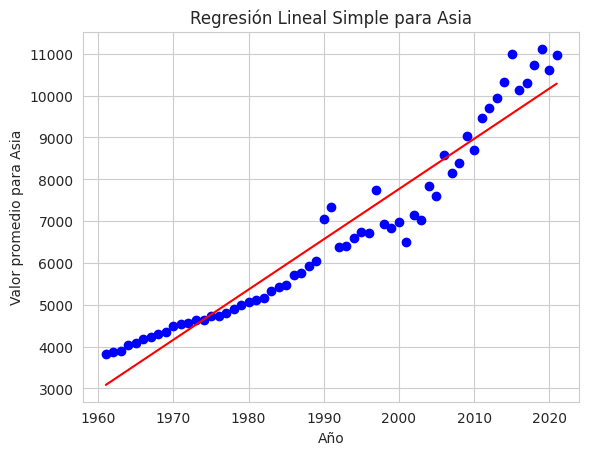

Intercepto: -232423.44662086578
Pendiente: 120.09484810764825
R^2: 0.9324213472470468


In [40]:
# Definir variables
X = df_años_categoria.index.values.reshape(-1, 1)  # Get year values from index
y = df_años_categoria['Asia']

model = LinearRegression()
model.fit(X, y)

# Visualización
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel('Año')
plt.ylabel('Valor promedio para Asia')
plt.title('Regresión Lineal Simple para Asia')
plt.savefig("regresion_asia.png", dpi=300, bbox_inches="tight")
plt.show()

# Coeficientes y R^2
print(f'Intercepto: {model.intercept_}')
print(f'Pendiente: {model.coef_[0]}')
print(f'R^2: {r2_score(y, model.predict(X))}')

In [41]:
# Filtramos el DataFrame para solo incluir filas donde 'Código del elemento' es 723113
df_filtrado = df_consolidado[df_consolidado['Código del elemento'] == 723113]

# Realizamos el groupby y calculamos el promedio de 'Valor' por 'Año' y 'Region'
df_años_categoria = df_filtrado.groupby(['Año', 'Region'])['Valor'].mean().unstack()

# Mostramos el resultado
print(df_años_categoria)

Region      Américas          Asia       Europa      Oceanía       África
Año                                                                      
1961     6968.825562  10440.497172  6689.609704  3652.720613  1378.866981
1962     7135.220753  10561.521332  6761.329193  3768.194449  1409.759096
1963     7247.910009  10646.130916  6690.342919  3832.955823  1429.044004
1964     7436.974582  11019.162591  6684.997825  3930.724429  1464.324027
1965     7632.338093  11163.334729  6815.637733  3993.834782  1517.535763
...              ...           ...          ...          ...          ...
2017    16611.862934  27725.281712  6012.946098  3351.294431  8705.107035
2018    16616.604926  28839.879050  6035.674265  3339.187507  8707.687198
2019    16819.860682  29913.128105  5977.809219  3139.538741  8840.362549
2020    16827.823071  28491.408765  6192.136111  2944.013552  8899.013861
2021    17099.086919  29720.089121  7716.513652  2937.108920  8962.255122

[61 rows x 5 columns]


In [42]:
# Realizamos el groupby y calculamos el promedio de 'Valor' por 'Año' y 'Código del elemento'
df_elemento = df_consolidado.groupby(['Año', 'Código del elemento'])['Valor'].mean().unstack()

In [43]:
# Tomamos el Elemento de mayor emision: Emisiones (CO2eq) (AR5)
df_elemento_723113 = df_elemento[723113]

# Convertir el índice a una columna para facilitar el acceso
df_elemento_723113 = df_elemento_723113.reset_index()

# Definir las características (Año) y la variable objetivo (Valor)
X = df_elemento_723113[['Año']]  # Característica: Año
y = df_elemento_723113[723113]

Mean Squared Error: 310357.9551175222
R^2 Score: 0.9569041574091841


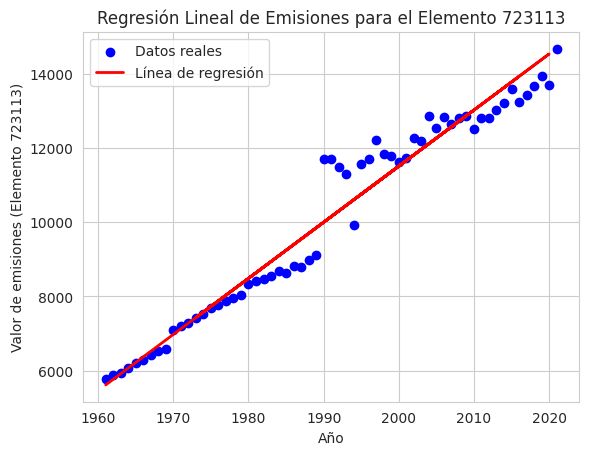

In [44]:
from sklearn.model_selection import train_test_split

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

# Crear el modelo
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

import matplotlib.pyplot as plt

# Visualizar los datos y la línea de regresión
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de regresión')
plt.xlabel('Año')
plt.ylabel('Valor de emisiones (Elemento 723113)')
plt.title('Regresión Lineal de Emisiones para el Elemento 723113')
plt.legend()
plt.savefig("regresion_elemento_723113.png", dpi=300, bbox_inches="tight")
plt.show()


In [45]:
# Predecir para los años futuros (por ejemplo, 2025 a 2030)
años_futuros = pd.DataFrame({'Año': [2025, 2026, 2027, 2028, 2029, 2030]})
predicciones_futuras = modelo.predict(años_futuros)

# Mostrar las predicciones
for año, prediccion in zip(años_futuros['Año'], predicciones_futuras):
    print(f'Predicción para el año {año}: {prediccion:.2f}')

Predicción para el año 2025: 15284.76
Predicción para el año 2026: 15435.85
Predicción para el año 2027: 15586.94
Predicción para el año 2028: 15738.03
Predicción para el año 2029: 15889.12
Predicción para el año 2030: 16040.21


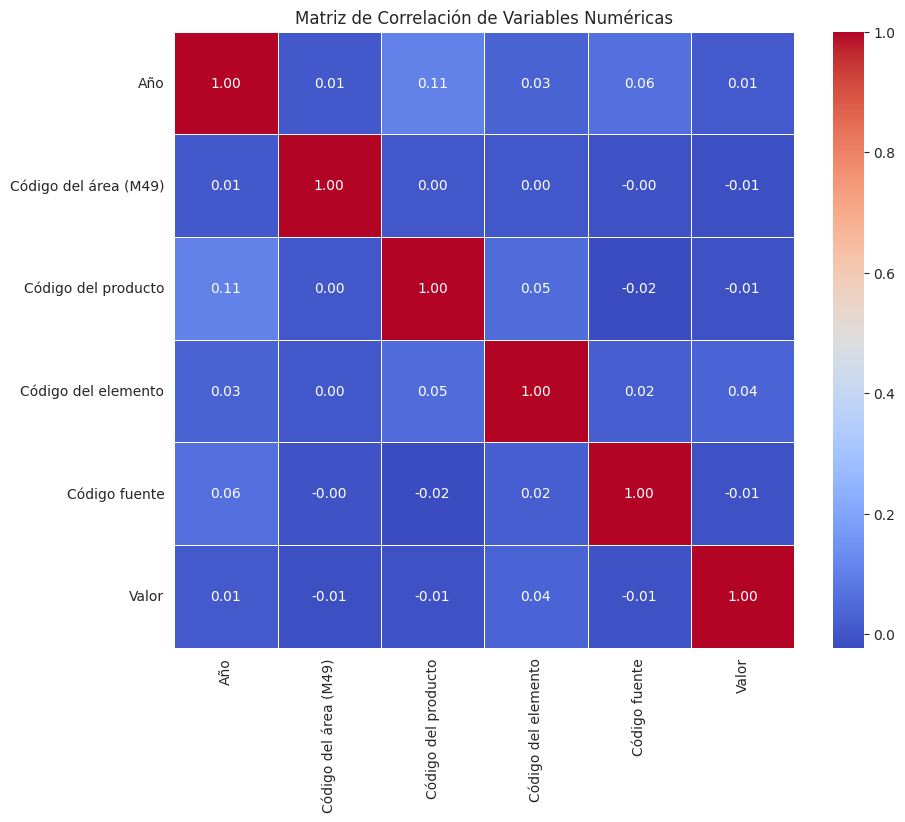

In [46]:
# Seleccionar solo las columnas numéricas
df_numeric = df_consolidado[['Año', 'Código del área (M49)', 'Código del producto',
                                              'Código del elemento', 'Código fuente', 'Valor']]

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.savefig("correlaciones.png", dpi=300, bbox_inches="tight")
plt.show()